In [1]:
import lightgbm

from webscrapping.model.lgbm_model import get_trained_model
from pathlib import Path
import os
import pandas as pd
import shap

vm = get_trained_model()
model: lightgbm.LGBMClassifier = vm.model
features = model.feature_name_

def get_dataset_reference():
    current_folder = Path(os.getcwd())
    model_folder = current_folder.parent
    webscrapping_folder = model_folder.parent
    return Path(webscrapping_folder, "matches", "datasets")

filename = "100.csv"
df = pd.read_csv(f"{get_dataset_reference()}\\{filename}")

[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=8, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=8
[LightGBM] [Warning] num_threads is set=5, n_jobs=-1 will be ignored. Current value: num_threads=5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
Model loading time: 3.8691293


In [2]:
data = df[features]

In [3]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(data)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


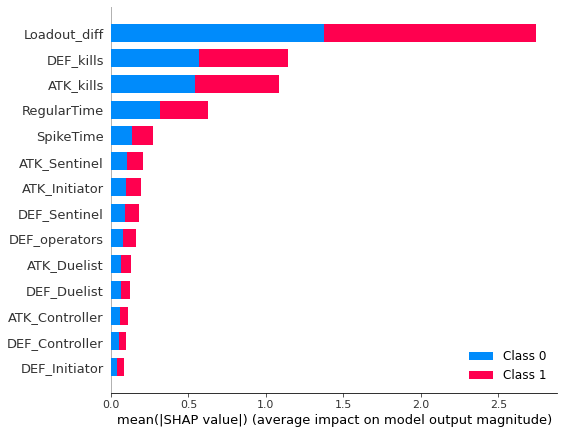

In [6]:
shap.summary_plot(shap_values, features=features, plot_type='bar')